# Prevendo o salário de uma pessoa

<figure align="center">
<img src="https://media-exp1.licdn.com/dms/image/C4D0BAQF5qVHC8HSZUQ/company-logo_200_200/0/1597176769890?e=1667433600&v=beta&t=Fthq9l_xi3wYEwcK98i70qjID_NlWmUtLi-kgaw2GdY" alt="Indicium" width="25%"/>

<figure-caption>**INDICIUM**</figure-caption>
</figure>

O projeto em questão é idealizado como parte do processo seletivo para formação em Ciência de Dados oferecido pela [Indicium](https://www.linkedin.com/company/indiciumtech/), via programa Lighthouse.

O projeto em questão tem como objetivo implementar um modelo que seja capaz de prever o salário anual de uma pessoa com base nas características fornecidas pelo dataset em questão, no caso se a pessoa irá ganhar um salário ">= 50K" ou "< 50k".

Neste problema de **classificação** iremos utilizar o conjunto de dados *wage_train* para treinar nosso modelo e posteriormente o conjunto de dados *wage_test* para prevermos os salários em um novo conjunto. 

Formalizado o problema, vamos começar. 

<figure align="center">
<img src="https://media3.giphy.com/media/26BRL3pw98MWNOy0U/giphy.gif?cid=ecf05e47b2ydwom483t14fbqgxwjadqft5gqrfyaav60o8cr&rid=giphy.gif&ct=g" width="20%" />
</figure>








## 01. Importação das bibliotecas centrais e Leitura da base de dados

In [2]:
# bib para leitura e manipulação de dados
import pandas as pd

### Dicionário de dados para o problema

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education_num: continuous.

marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital_gain: continuous.

capital_loss: continuous.

hours_per_week: continuous.

native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

yearly_wage: >50K, <=50K.

In [3]:
# lendo a base de dados
wage_df = pd.read_csv("/content/drive/MyDrive/DS-and-IA/Lighthouse - Cientista de Dados/wage_train.csv")

## 02. Explorando a base de dados

In [4]:
wage_df.sample(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
25436,25436,51,Self-emp-inc,100029,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K
12999,12999,50,Self-emp-not-inc,176867,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,3781,0,40,United-States,<=50K
19682,19682,38,Private,260997,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
19560,19560,29,?,256211,1st-4th,2,Never-married,?,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
1300,1300,29,Private,419721,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,40,Japan,<=50K


In [5]:
wage_df.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [6]:
# contagem de valores nulos
wage_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
yearly_wage       0
dtype: int64

In [7]:
# tipos de dados
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  yearly_wage     32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# investigando a coluna "capital_gain"
wage_df.loc[wage_df["yearly_wage"] == " >50K"].sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_wage
4176,41,Private,84610,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,>50K
28293,65,Self-emp-inc,210381,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,65,United-States,>50K
14792,44,Private,523484,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,>50K
20282,49,State-gov,423222,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,99999,0,80,United-States,>50K
28894,33,Private,405913,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Peru,>50K
1326,52,Private,168381,HS-grad,9,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
5165,41,Federal-gov,168294,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,5178,0,40,United-States,>50K
12563,64,Private,391121,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,>50K
28110,48,Private,141511,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
5642,38,Private,256864,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K


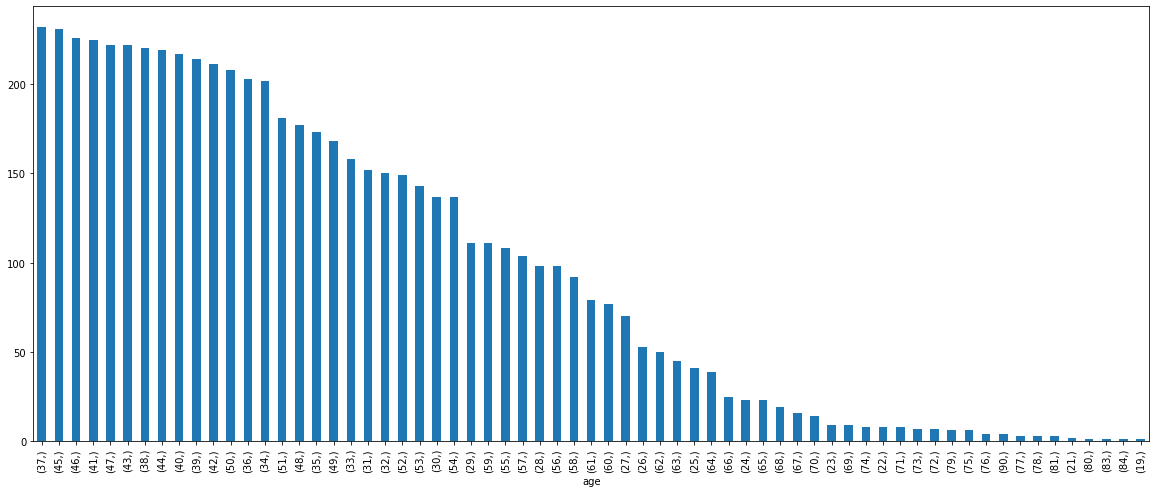

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
wage_df.loc[(wage_df["yearly_wage"] == " >50K") & (wage_df["capital_gain"] == 0)][["age"]].value_counts().plot(kind="bar")

Pelo gráfico acima aparentemente as pessoas com um "capital_gain" igual $0$ que ganham um salário anual ">50K" possuem uma distribuição assimétrica e com grande variação em relação às idades. Deste modo, essa coluna não traz tanto sentido lógico para ser utilizado posteriormente no nosso modelo.

In [10]:
# dados únicos por coluna
for column in wage_df.columns:
  print(f"Coluna: {column}")
  print(wage_df[column].unique(), "\n--------------------------------------------------------")

Coluna: age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 
--------------------------------------------------------
Coluna: workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 
--------------------------------------------------------
Coluna: fnlwgt
[ 83311 215646 234721 ...  34066  84661 257302] 
--------------------------------------------------------
Coluna: education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 
--------------------------------------------------------
Coluna: education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 
----------------------------------------------

Quais colunas extrair para a análise? Existe alguma relação entre o salário e o sexo da pessoa? Existe alguma relação entre o salário e o país da pessoa? Existe alguma relação entre a raça ou a educação com o salário da pessoa?

In [11]:
# relação entre as colunas "education" e "education_num"
wage_df[["education", "education_num"]].sort_values(by=["education_num"]).drop_duplicates()

,education,education_num
21793,Preschool,1
31517,1st-4th,2
17090,5th-6th,3
30285,7th-8th,4
6084,9th,5
14513,10th,6
8351,11th,7
21093,12th,8
11952,HS-grad,9
4882,Some-college,10


Aparentemente a coluna "education_num" categoriza numericamente os dados da coluna "education".

In [12]:
# salvando a relação entre as colunas analisadas acima 
education_to_num_df = wage_df[["education", "education_num"]].sort_values(by=["education_num"]).drop_duplicates()

In [13]:
# contando os valores do tipo "?"
wage_df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
print(f'Número de valores do tipo "?" em relação ao total de amostras: {(1843 / wage_df["occupation"].value_counts().sum()) * 100:.2f}% ')

Número de valores do tipo "?" em relação ao total de amostras: 5.66% 


Como o número de linhas cuja feature "occupation" contém o valor "?" é muito pequeno em relação ao total de amostras, vamos utilizar somente as linhas que não contém esse valor:

In [15]:
wage_df2 = wage_df.copy()

In [16]:
wage_df2 = wage_df2.loc[wage_df2["occupation"] != ' ?']

In [17]:
wage_df2["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [18]:
# número de linhas e colunas restantes
wage_df2.shape

(30717, 15)

In [19]:
# plot da distribuição de cada variável
import seaborn as sns

Seguindo as perguntas referentes às relações das colunas do dataset e seus respectivos impactos na variável que estamos tentando predizer, segue intuitivamente uma lista de colunas que pode ter maior relevância para a análise:

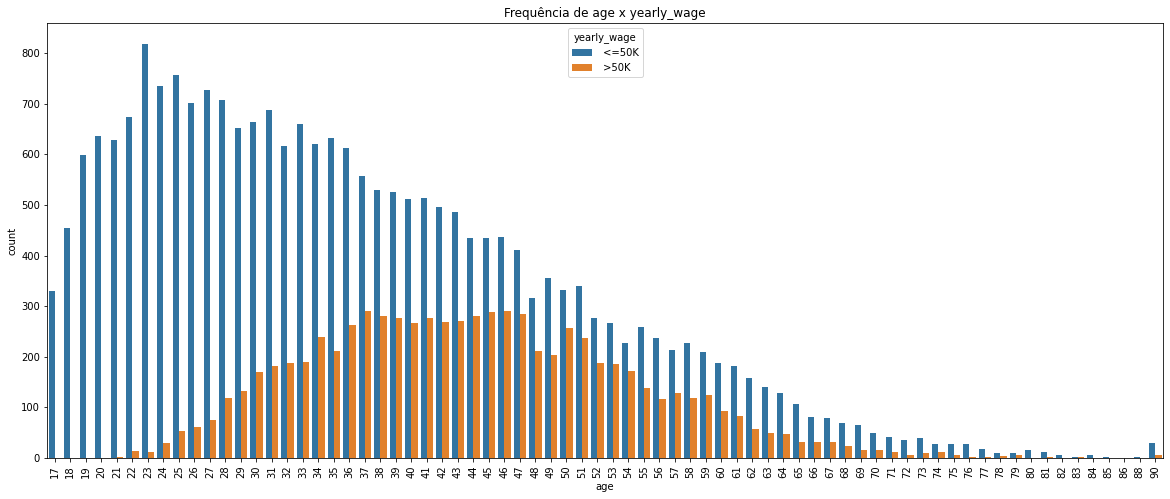


--------------------------------------------------------------------------------


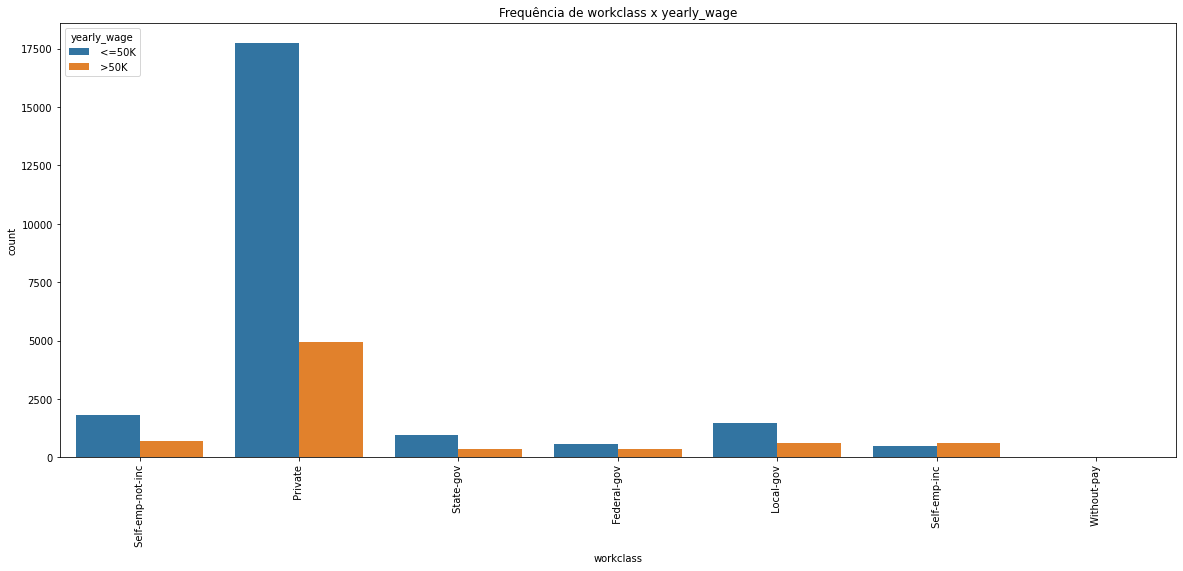


--------------------------------------------------------------------------------


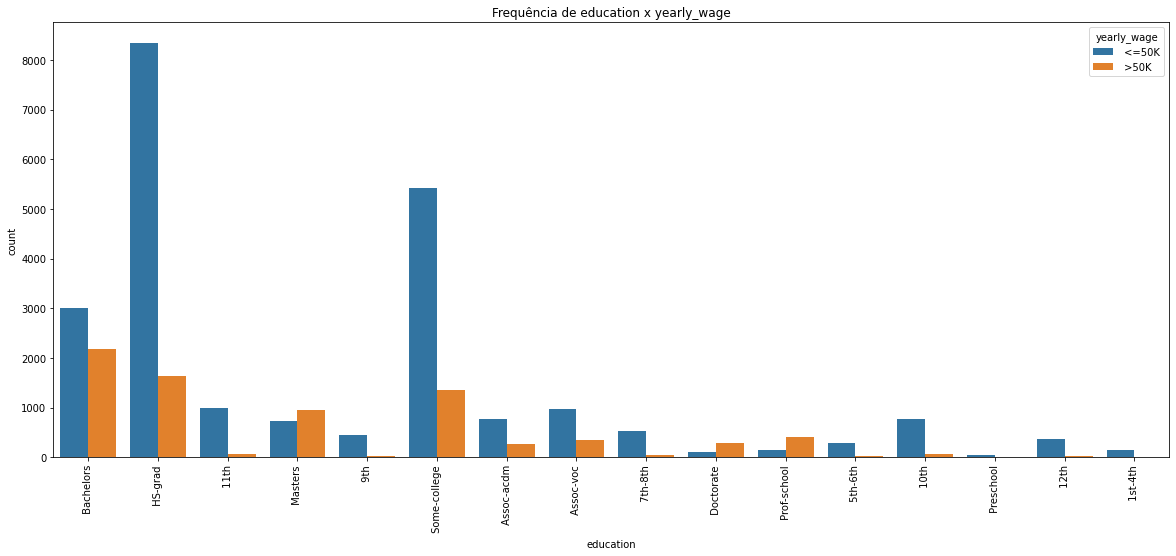


--------------------------------------------------------------------------------


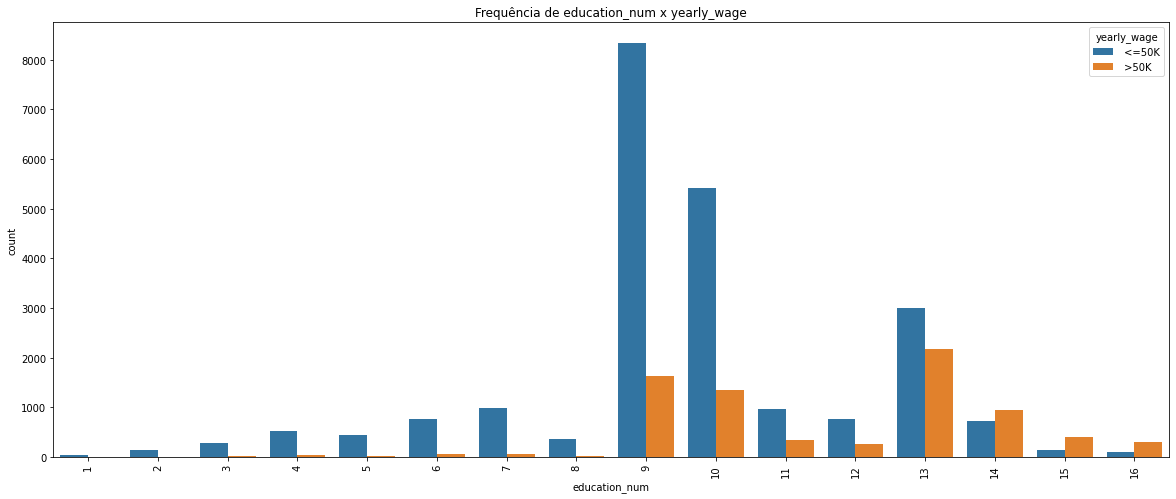


--------------------------------------------------------------------------------


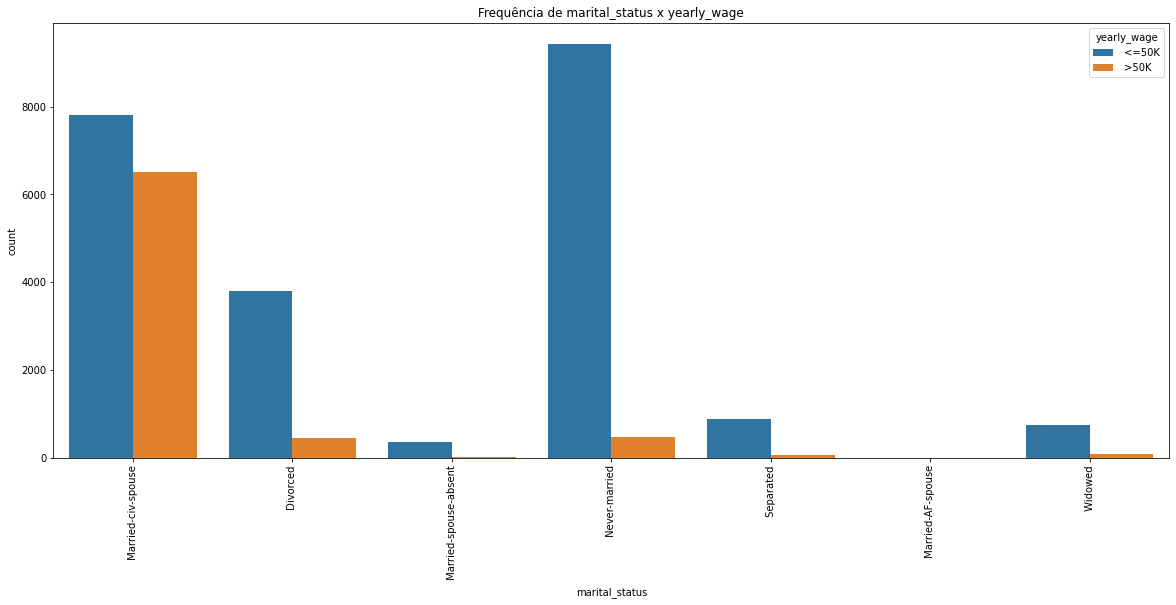


--------------------------------------------------------------------------------


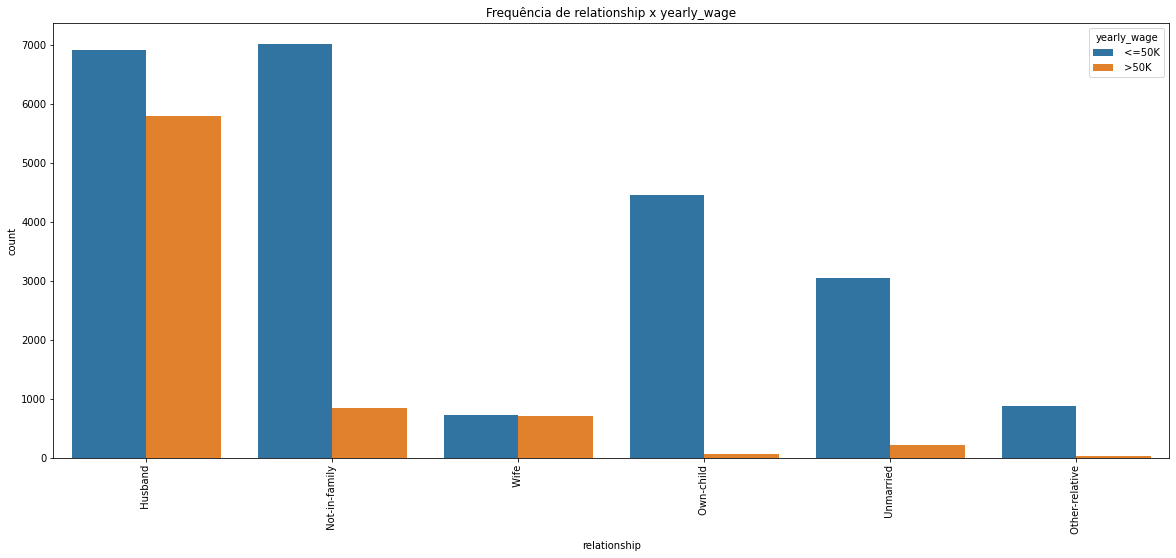


--------------------------------------------------------------------------------


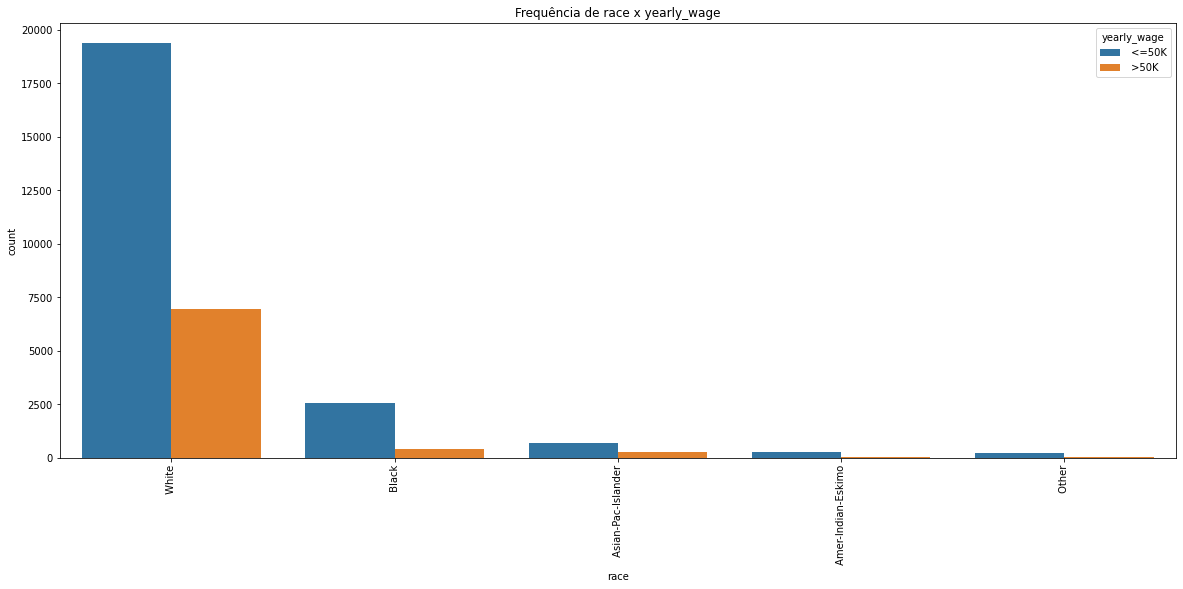


--------------------------------------------------------------------------------


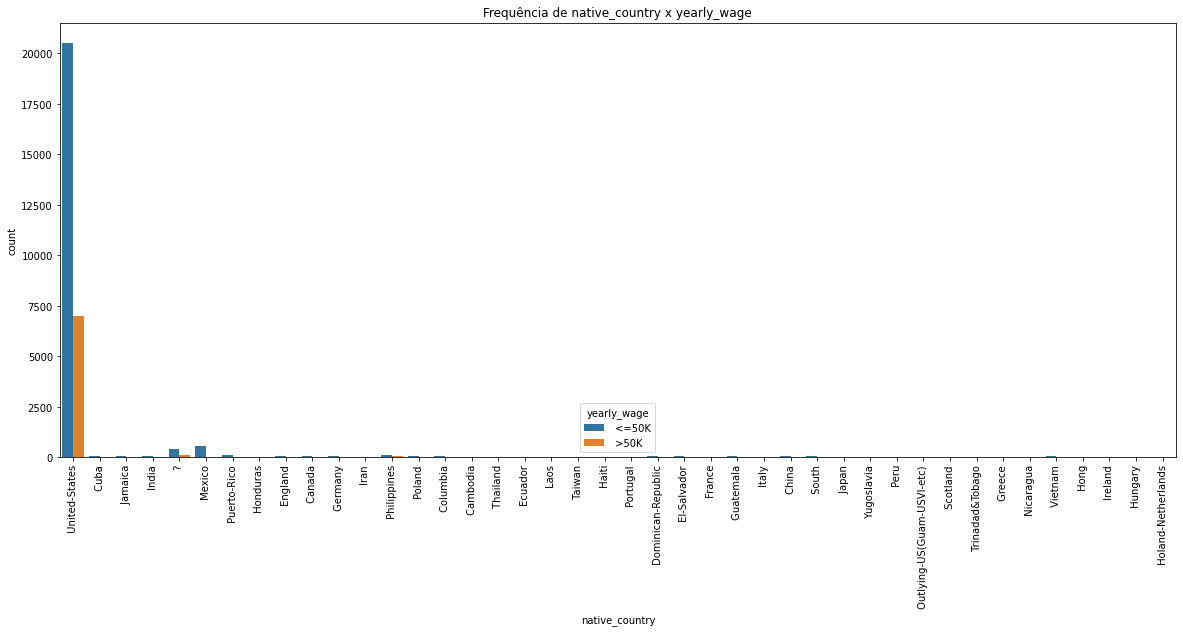


--------------------------------------------------------------------------------


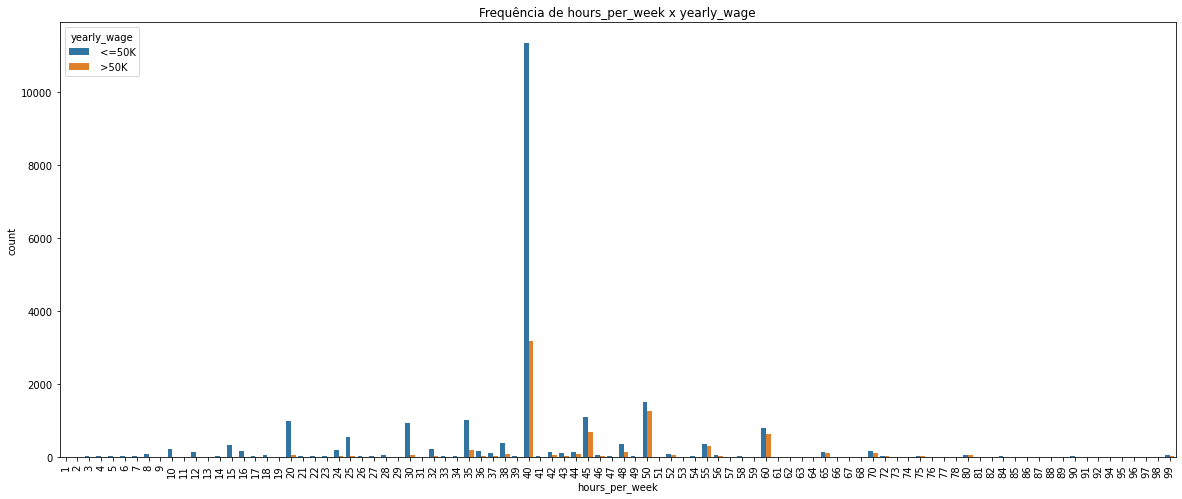


--------------------------------------------------------------------------------


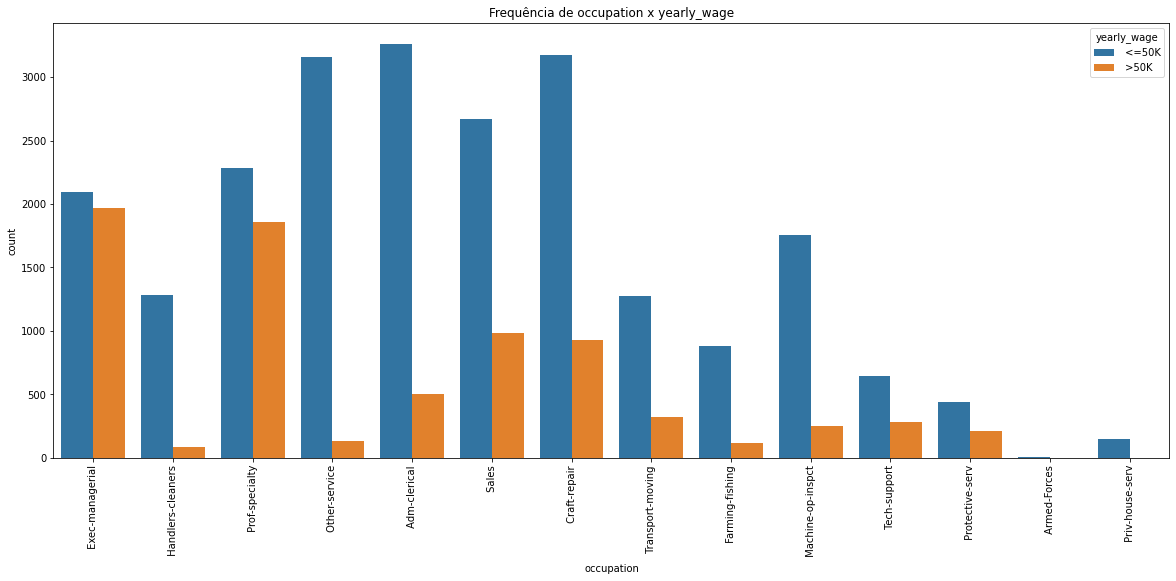


--------------------------------------------------------------------------------


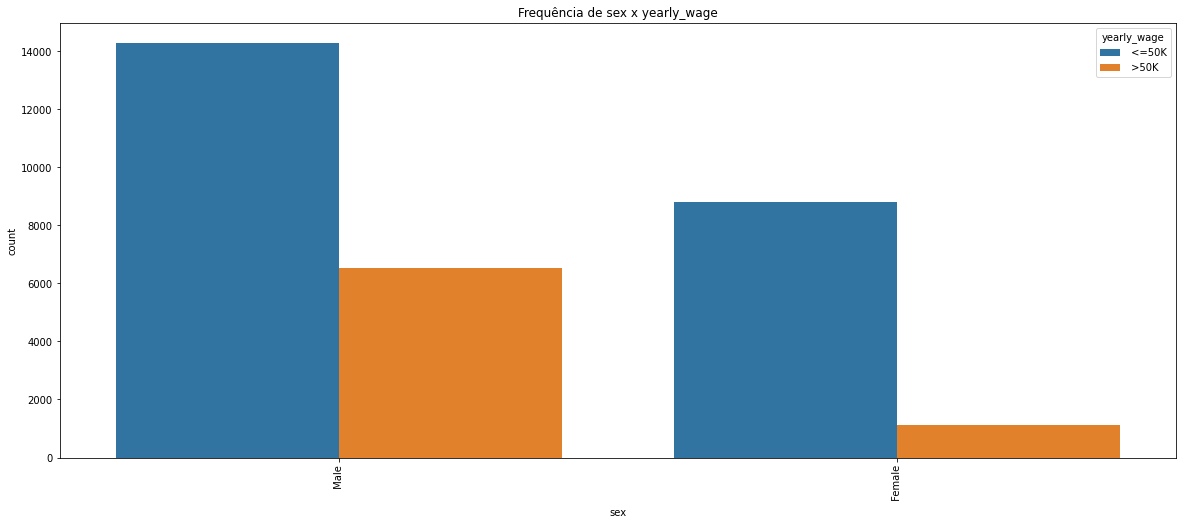


--------------------------------------------------------------------------------


In [20]:
# colunas candidatas a serem selecionadas para a análise
columns = ["age", "workclass", "education", "education_num", "marital_status", "relationship", "race", "native_country", "hours_per_week", "occupation", "sex"]

for column in columns:
  plt.figure(figsize=(20, 8))
  plt.title(f"Frequência de {column} x yearly_wage")
  sns.countplot(x=column, hue="yearly_wage", data=wage_df2)
  plt.xticks(rotation=90)
  plt.show()

  print("\n--------------------------------------------------------------------------------")

Como já era de se esperar, temos uma maior distinção de salários da categoria ">50K" para as features "sex", "occupation", "native_country", "rece", "relationship" e "workclass". (São apresentadas outras features porém essas são as que mais se destacam.)

## 03. Pré-Processamento da base de dados e Seleção das features a serem usadas

In [21]:
# check de balanceamento entre as classes a serem preditas
wage_df2["yearly_wage"].value_counts()

 <=50K    23067
 >50K      7650
Name: yearly_wage, dtype: int64

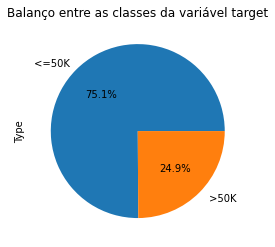

In [22]:
plt.title("Balanço entre as classes da variável target")
wage_df2.groupby('yearly_wage').size().plot(kind='pie',
                                       y = "yearly_wage",
                                       label = "Type",
                                       autopct='%1.1f%%')
plt.show()

Claramente existe um desbalanceamento entre as classes, de modo que precisamos lidar com isso para eliminar qualquer possível viés do nosso problema. Caso contrário, nosso modelo terá uma performance melhor prevendo uma classe em detrimento da outra. 

Antes de aplicarmos o método de **upsampling** (que irá balancear as nossas classes target), vamos selecionar as nossas features a serem usadas e também convertê-las para o tipo numérico, dado que alguns algoritmos trabalham melhor com esse tipo de dado.

### Selecionando as features para o problema em questão

In [23]:
# transformando nossos dados para o tipo numérico com base na pergunta: "o salário anual é maior que 50K?" 
# >50K: 1 (positive class), <=50K: 0 (negative class) 
wage_df2["yearly_wage"] = wage_df2["yearly_wage"].map({' <=50K': 0, ' >50K': 1})

In [24]:
features = ["age", "workclass", "education_num", "marital_status", "relationship", "race", "native_country", "hours_per_week", "occupation", "sex"]
target_class = ["yearly_wage"]

In [25]:
X_bar_df = wage_df2[features]
y_bar_df = wage_df2[target_class]

In [26]:
X_bar_df.head()

,age,workclass,education_num,marital_status,relationship,race,native_country,hours_per_week,occupation,sex
0,50,Self-emp-not-inc,13,Married-civ-spouse,Husband,White,United-States,13,Exec-managerial,Male
1,38,Private,9,Divorced,Not-in-family,White,United-States,40,Handlers-cleaners,Male
2,53,Private,7,Married-civ-spouse,Husband,Black,United-States,40,Handlers-cleaners,Male
3,28,Private,13,Married-civ-spouse,Wife,Black,Cuba,40,Prof-specialty,Female
4,37,Private,14,Married-civ-spouse,Wife,White,United-States,40,Exec-managerial,Female


In [27]:
y_bar_df.head()

,yearly_wage
0,0
1,0
2,0
3,0
4,0


### Tranformando as variáveis categóricas para o tipo numérico adequado

In [28]:
X_bar_df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'relationship',
       'race', 'native_country', 'hours_per_week', 'occupation', 'sex'],
      dtype='object')

In [29]:
X_bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30717 non-null  int64 
 1   workclass       30717 non-null  object
 2   education_num   30717 non-null  int64 
 3   marital_status  30717 non-null  object
 4   relationship    30717 non-null  object
 5   race            30717 non-null  object
 6   native_country  30717 non-null  object
 7   hours_per_week  30717 non-null  int64 
 8   occupation      30717 non-null  object
 9   sex             30717 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.6+ MB


In [30]:
X_bar_df["workclass"].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

Pelo gráfico de frequência de "workclass" podemos criar uma relação de ordem entre os dados da coluna em questão com base nisso.

In [31]:
# tranformação com base no peso de relevância de cada item da feature em questão
X_bar_df["workclass"] = X_bar_df["workclass"].map({' Self-emp-not-inc': 6, ' Private': 7,
                                                   ' State-gov': 4, ' Federal-gov': 3,
                                                   ' Local-gov': 5, ' Self-emp-inc': 2, ' Without-pay': 1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
X_bar_df["workclass"].unique()

array([6, 7, 4, 3, 5, 2, 1])

In [33]:
X_bar_df.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'relationship',
       'race', 'native_country', 'hours_per_week', 'occupation', 'sex'],
      dtype='object')

In [34]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
X_bar_df[['marital_status', 'relationship', 'race', 'native_country', 'occupation', 'sex']] = ord_enc.fit_transform(X_bar_df[['marital_status',
                                                                                                                              'relationship',
                                                                                                                              'race',
                                                                                                                              'native_country',
                                                                                                                              'occupation',
                                                                                                                              'sex']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [35]:
X_bar_df.head()

,age,workclass,education_num,marital_status,relationship,race,native_country,hours_per_week,occupation,sex
0,50,6,13,2.0,0.0,4.0,39.0,13,3.0,1.0
1,38,7,9,0.0,1.0,4.0,39.0,40,5.0,1.0
2,53,7,7,2.0,0.0,2.0,39.0,40,5.0,1.0
3,28,7,13,2.0,5.0,2.0,5.0,40,9.0,0.0
4,37,7,14,2.0,5.0,4.0,39.0,40,3.0,0.0


In [36]:
X_bar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30717 entries, 0 to 32559
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30717 non-null  int64  
 1   workclass       30717 non-null  int64  
 2   education_num   30717 non-null  int64  
 3   marital_status  30717 non-null  float64
 4   relationship    30717 non-null  float64
 5   race            30717 non-null  float64
 6   native_country  30717 non-null  float64
 7   hours_per_week  30717 non-null  int64  
 8   occupation      30717 non-null  float64
 9   sex             30717 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.6 MB


In [37]:
X_bar_df["occupation"].unique()

array([ 3.,  5.,  9.,  7.,  0., 11.,  2., 13.,  4.,  6., 12., 10.,  1.,
        8.])

### Upsampling com SMOTE - Synthetic Minority Over-sampling Technique

In [38]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from imblearn.over_sampling import SMOTE

upsamp = SMOTE(random_state=42)
X_upsamp, y_upsamp = upsamp.fit_resample(X_bar_df, y_bar_df)

In [40]:
# antes
print(X_bar_df.shape)
print(y_bar_df.value_counts())

(30717, 10)
yearly_wage
0              23067
1               7650
dtype: int64


In [41]:
# depois
print(X_upsamp.shape)
print(y_upsamp.value_counts())

(46134, 10)
yearly_wage
0              23067
1              23067
dtype: int64


In [42]:
X_upsamp.head()

,age,workclass,education_num,marital_status,relationship,race,native_country,hours_per_week,occupation,sex
0,50,6,13,2.0,0.0,4.0,39.0,13,3.0,1.0
1,38,7,9,0.0,1.0,4.0,39.0,40,5.0,1.0
2,53,7,7,2.0,0.0,2.0,39.0,40,5.0,1.0
3,28,7,13,2.0,5.0,2.0,5.0,40,9.0,0.0
4,37,7,14,2.0,5.0,4.0,39.0,40,3.0,0.0


In [43]:
y_upsamp

,yearly_wage
0,0
1,0
2,0
3,0
4,0
...,...
46129,1
46130,1
46131,1
46132,1


Finalizados os tratamentos básicos podemos iniciar a etapa de seleção de algoritmos de aprendizado.

## 04. Seleção do modelo

### Divisão entre treino e teste (divisão básica padrão)

In [44]:
# divisão dos dados entre treino e teste (abordagem padrão básica)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_upsamp, y_upsamp, test_size=0.33, random_state=14)

### Modelo LogisticRegression

In [45]:
# vamos usar como baseline a regressão logística
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
# metricas para avaliação do modelo usado como baseline
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74      7642
           1       0.73      0.77      0.75      7583

    accuracy                           0.74     15225
   macro avg       0.74      0.74      0.74     15225
weighted avg       0.74      0.74      0.74     15225



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


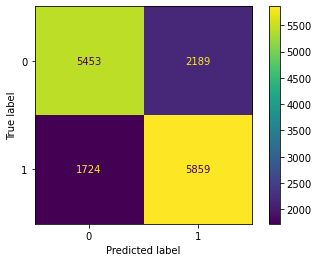

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

### Modelo SGDClassifier

In [49]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
sgdc.fit(X_train, y_train)

y_pred = sgdc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.34      0.49      7642
           1       0.59      0.96      0.73      7583

    accuracy                           0.65     15225
   macro avg       0.75      0.65      0.61     15225
weighted avg       0.75      0.65      0.61     15225



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


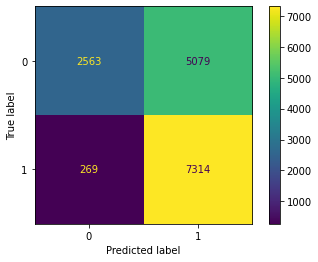

In [52]:
plot_confusion_matrix(sgdc, X_test, y_test)
plt.show()

### RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=5, random_state=0)
rfc.fit(X_train, y_train)

y_pred = sgdc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.34      0.49      7642
           1       0.59      0.96      0.73      7583

    accuracy                           0.65     15225
   macro avg       0.75      0.65      0.61     15225
weighted avg       0.75      0.65      0.61     15225



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


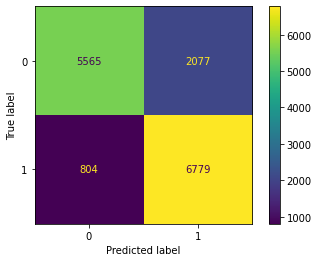

In [56]:
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

Vamos usar o modelo gerado pela Regressão Logística para nossa classificação, dado que foi o com melhor performance no contexto em questão.

## 05. Implementando a Regressão Logística num novo conjunto de dados

In [71]:
input_dataframe = pd.read_csv("/content/drive/MyDrive/DS-and-IA/Lighthouse - Cientista de Dados/wage_test.csv")

In [72]:
input_dataframe.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [73]:
# bibs usadas para a analise e classficação em questão

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def pipeline(input_dataframe):
  '''
    input_dataframe: dataframe de input a ser usado como base para a predição
    wage_predict_df: output com as predições do modelo de Regressão Logística
  '''

  # tratamento inicial dos dados
  input_dataframe.drop(labels="Unnamed: 0", axis=1, inplace=True)
  input_dataframe = input_dataframe.loc[input_dataframe["occupation"] != ' ?']

  # feature selection
  features = ["age", "workclass", "education_num", "marital_status", "relationship", "race", "native_country", "hours_per_week", "occupation", "sex"]

  X_bar_df = input_dataframe[features]

  # tranformação com base no peso de relevância de cada item da feature em questão
  X_bar_df["workclass"] = X_bar_df["workclass"].map({' Self-emp-not-inc': 6, ' Private': 7,
                                                   ' State-gov': 4, ' Federal-gov': 3,
                                                   ' Local-gov': 5, ' Self-emp-inc': 2, ' Without-pay': 1})
  
  ord_enc = OrdinalEncoder()
  X_bar_df[['marital_status', 'relationship', 'race', 'native_country', 'occupation', 'sex']] = ord_enc.fit_transform(X_bar_df[['marital_status',
                                                                                                                              'relationship',
                                                                                                                              'race',
                                                                                                                              'native_country',
                                                                                                                              'occupation',
                                                                                                                              'sex']])
  # predição a partir do modelo gerado pela Regressão Logística
  y_pred = log_reg.predict(X_bar_df)

  # mapping
  wage_predict_df = pd.DataFrame({"yearly_wage": y_pred})
  wage_predict_df["yearly_wage"] = wage_predict_df["yearly_wage"].map({0: ' <=50K', 1: ' >50K'})

  return wage_predict_df

In [74]:
wage_predict_df = pipeline(input_dataframe)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [75]:
wage_predict_df

,yearly_wage
0,>50K
1,>50K
2,<=50K
3,<=50K
4,>50K
...,...
15309,<=50K
15310,>50K
15311,>50K
15312,>50K


In [76]:
wage_predict_df.to_csv("/content/drive/MyDrive/DS-and-IA/Lighthouse - Cientista de Dados/predict.csv")

## Conclusões

O projeto acima foi somente uma parte de muitas possibilidades para a solução do problema em questão. Obviamente ainda existem muitos pontos de melhorias que podem ser implementados, alguns como:
  - Analisar como outros algoritmos como One-Hot-Encoder mudam a perfomance do modelo implementado, dado que o algoritmo Label Encoder pode introduzir algum viés que antes não existia no problema;

  - Implementar técnicas de tunning de hiperparâmetros como GridSearch para buscar a melhor combinação possível de hiperparâmetros para cada algoritmo estudado;

  - Aplicar métodos de validação cruzada de modo a eliminar possíveis viés devido à divisão "train_test_split" que simplesmente divide nosso conjunto de dados entre treino e teste, sem aproveitar todas as possibilidades do nosso dataset;

  - Analisar se as features selecionadas são de fato as melhores e se existe outra combinação que pode trazer melhorias para a classificação, etc.

De modo geral, sempre é proveitoso implementar a solução de um problema do zero, uma vez que traz novos conhecimentos e reforça outros. 

Deste modo, agradeço à [Indicium](https://www.linkedin.com/company/indiciumtech/) pela a oportunidade, que novamente foi muito proveitosa.

<figure align="center">
<img src="https://media2.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif?cid=ecf05e47chp6w1wusr7f3izsa1sx0n6vce9mg1nkv8vortwe&rid=giphy.gif&ct=g" width="40%" />
</figure>